# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json

In [93]:
df_twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [94]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [95]:
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [96]:
"""import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)"""

'import tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_twit

In [97]:
df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [98]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [99]:
df_tweet = pd.DataFrame(df_list, columns=['id','retweet_count','favorite_count'])
df_tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [100]:
df_tweet.to_csv('df_tweet.csv',index=False)

In [101]:
tweet=pd.read_csv('df_tweet.csv')
tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment 

In [102]:
df_twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [103]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [104]:
tweet

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### Programmatic Assessment

In [105]:
df_twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [106]:
df_twitter_archive_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [107]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [108]:
df_twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [109]:
df_twitter_archive_enhanced['tweet_id'].duplicated().any()

False

In [110]:
df_twitter_archive_enhanced['name'].value_counts()

None           745
a               55
Charlie         12
Cooper          11
Lucy            11
Oliver          11
Tucker          10
Lola            10
Penny           10
Bo               9
Winston          9
Sadie            8
the              8
an               7
Buddy            7
Daisy            7
Toby             7
Bailey           7
Bella            6
Milo             6
Jack             6
Leo              6
Oscar            6
Koda             6
Scout            6
Rusty            6
Jax              6
Stanley          6
Dave             6
very             5
              ... 
Darla            1
Filup            1
Peanut           1
Chase            1
Kramer           1
Monster          1
Nigel            1
Henry            1
Margo            1
Lacy             1
Freddery         1
light            1
Bubba            1
Shooter          1
Sora             1
Alf              1
Ivar             1
Kevon            1
Barney           1
Franq            1
Fabio            1
Rambo       

In [111]:
sum(df_twitter_archive_enhanced.text.isnull())

0

In [112]:
sum(df_twitter_archive_enhanced.name.isnull())

0

In [113]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [114]:
df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [115]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [116]:
df_image_predictions['jpg_url'].duplicated().any()

True

In [117]:
df_image_predictions[df_image_predictions['jpg_url'].duplicated()]['jpg_url']

1297    https://pbs.twimg.com/ext_tw_video_thumb/67535...
1315      https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg
1333      https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg
1345      https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg
1349      https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg
1364    https://pbs.twimg.com/tweet_video_thumb/CeBym7...
1368      https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg
1387      https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg
1407      https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg
1417      https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg
1427      https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg
1446      https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg
1453      https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg
1456      https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg
1463      https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg
1476      https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg
1487      https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg
1495      http

In [118]:
df_image_predictions['jpg_url'].value_counts()

https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                                            2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                       

In [119]:
sum(df_image_predictions.jpg_url.isnull())

0

In [120]:
tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [121]:
tweet.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [122]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [123]:
tweet['id'].duplicated().any()

False

In [124]:
sum(tweet.retweet_count.isnull())

0

In [125]:
sum(tweet.favorite_count.isnull())

0

### Quality issues
1.Timestamp not object is datetime.

2.Tweet_id not int is object.

3.Delete retweet.

4.Delete columns that not use.

5.Lowercase text.

6.Delete <a href= from source.

7.Replace a, an, the from name to None and Lowercase name.

8.Convert p1, p2, p3 the first letter capital only.

9.Delete invalid numerator/ denominator.

### Tidiness issues
1.Create new column and add (doggo, floofer, pupper and puppo columns) to the new column.

2.Create new dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [126]:
# Make copies of original pieces of data
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced.copy()
df_image_predictions_clean = df_image_predictions.copy()
tweet_clean = tweet.copy()

## Tidiness issues

### Issue #1: 

#### Define: Create new column and add (doggo, floofer, pupper and puppo columns) to the new column.

#### Code

In [127]:
df_twitter_archive_enhanced_clean['dog_type'] = None
for i in range(0,len(df_twitter_archive_enhanced_clean)):
    if df_twitter_archive_enhanced_clean['doggo'][i] == 'doggo':
        df_twitter_archive_enhanced_clean['dog_type'][i] = 'doggo'
    elif df_twitter_archive_enhanced_clean['floofer'][i] == 'floofer':
        df_twitter_archive_enhanced_clean['dog_type'][i] = 'floofer'
    elif df_twitter_archive_enhanced_clean['pupper'][i] == 'pupper':
        df_twitter_archive_enhanced_clean['dog_type'][i] = 'pupper'
    elif df_twitter_archive_enhanced_clean['puppo'][i] == 'puppo':
        df_twitter_archive_enhanced_clean['dog_type'][i] = 'puppo'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: Sett

#### Test

In [128]:
df_twitter_archive_enhanced_clean['dog_type']

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9        doggo
10        None
11        None
12       puppo
13        None
14       puppo
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29      pupper
         ...  
2326      None
2327      None
2328      None
2329      None
2330      None
2331      None
2332      None
2333      None
2334      None
2335      None
2336      None
2337      None
2338      None
2339      None
2340      None
2341      None
2342      None
2343      None
2344      None
2345      None
2346      None
2347      None
2348      None
2349      None
2350      None
2351      None
2352      None
2353      None
2354      None
2355      None
Name: dog_type, Length: 2356, dtype: object

### Issue #2: 

#### Define: Create new dataframe by using merge.

#### Code

In [129]:
df3 = df_twitter_archive_enhanced_clean.merge(df_image_predictions_clean, how='inner', on='tweet_id')
dfs = df3.merge(tweet_clean, how='inner',left_on='tweet_id', right_on='id')

#### Test

In [130]:
dfs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,892420643555336193,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,891815181378084864,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,891689557279858688,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,891327558926688256,9774,41048
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,891087950875897856,3261,20562
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,890971913173991426,2158,12041
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,890729181411237888,16716,56848
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,890609185150312448,4429,28226
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,890240255349198849,7711,32467


## Quality issues

### Issue #1:

#### Define :  Change datatypes of timestamp from object to datetime.

#### Code

In [131]:
dfs['timestamp']= pd.to_datetime(dfs['timestamp'])

#### Test

In [132]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
dog_type                   

### Issue #2:

#### Define: Change datatypes of tweet_id from int to object.

#### Code

In [133]:
dfs["tweet_id"] = dfs['tweet_id'].astype(str)

#### Test

In [134]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
dog_type                  

### Issue #3:

#### Define: Delete retweet.

#### Code

In [135]:
dfs = dfs[pd.isnull(dfs.retweeted_status_id)].reset_index()

#### Test

In [136]:
dfs

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,...,False,bagel,0.085851,False,banana,0.076110,False,892420643555336193,8853,39467
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,...,True,Pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,6514,33819
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,...,True,malamute,0.078253,True,kelpie,0.031379,True,891815181378084864,4328,25461
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,891689557279858688,8964,42908
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,891327558926688256,9774,41048
5,5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,891087950875897856,3261,20562
6,6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,890971913173991426,2158,12041
7,7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,890729181411237888,16716,56848
8,8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,890609185150312448,4429,28226
9,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,890240255349198849,7711,32467


### Issue #4:

#### Define: Delete columns that not use.

#### Code

In [137]:
dfs = dfs.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id','doggo','puppo','pupper','floofer'], axis=1)

#### Test

In [138]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 24 columns):
index                 1994 non-null int64
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_type              306 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-

### Issue #5:

#### Define: Lowercase text.

#### Code

In [139]:
dfs['text'] = dfs['text'].str.lower()

#### Test

In [140]:
dfs['text']

0       this is phineas. he's a mystical boy. only eve...
1       this is tilly. she's just checking pup on you....
2       this is archie. he is a rare norwegian pouncin...
3       this is darla. she commenced a snooze mid meal...
4       this is franklin. he would like you to stop ca...
5       here we have a majestic great white breaching ...
6       meet jax. he enjoys ice cream so much he gets ...
7       when you watch your owner call another dog a g...
8       this is zoey. she doesn't want to be one of th...
9       this is cassie. she is a college pup. studying...
10      this is koda. he is a south australian decksha...
11      this is bruno. he is a service shark. only get...
12      here's a puppo that seems to be on the fence a...
13      this is ted. he does his best. sometimes that'...
14      this is stuart. he's sporting his favorite fan...
15      this is oliver. you're witnessing one of his m...
16      this is jim. he found a fren. taught him how t...
17      this i

### Issue #6:

#### Define: Delete <a href= , rel="nofollow" Twitter for iPhone /a> from source.

#### Code

In [141]:
dfs['source'] = dfs['source'].str.replace('<a href=', '')

In [142]:
dfs['source'] = dfs['source'].str.replace('rel="nofollow">Twitter for iPhone</a>', '')
dfs['source'] = dfs['source'].str.replace('rel="nofollow">Vine - Make a Scene</a>', '')
dfs['source'] = dfs['source'].str.replace('rel="nofollow">TweetDeck</a>', '')
dfs['source'] = dfs['source'].str.replace('rel="nofollow">Twitter Web Client</a>', '')

#### Test

In [143]:
dfs['source'].value_counts()

"http://twitter.com/download/iphone"               1955
"http://twitter.com"                                 28
"https://about.twitter.com/products/tweetdeck"       11
Name: source, dtype: int64

There is an error in the link, which is forgetting the letter m in the word com

In [144]:
dfs['source'] = dfs['source'].str.replace('"http://vine.co', '"http://vine.com')

In [145]:
dfs['source'].value_counts()

"http://twitter.com/download/iphone"               1955
"http://twitter.com"                                 28
"https://about.twitter.com/products/tweetdeck"       11
Name: source, dtype: int64

### Issue #7:

#### Define: Replace a, an, the from name to None and convert the first letter capital.

#### Code

In [146]:
dfs['name'] = dfs['name'].str.replace('a', 'None')
dfs['name'] = dfs['name'].str.replace('an', 'None')
dfs['name'] = dfs['name'].str.replace('the', 'None')

In [147]:
dfs['name'] = dfs['name'].str.capitalize()

#### Test

In [148]:
dfs['name'].value_counts()

None            608
Chnonerlie       11
Oliver           10
Lucy             10
Cooper           10
Tucker            9
Penny             9
Winston           8
Snonedie          8
Dnoneisy          7
Lolnone           7
Toby              7
Stnonenley        6
Kodnone           6
Bo                6
Nonen             6
Bellnone          6
Jnonex            6
Oscnoner          5
Buddy             5
Dnoneve           5
Scout             5
Louis             5
Milo              5
Bnoneiley         5
Rusty             5
Leo               5
Chester           5
Sophie            4
Scooter           4
               ... 
Chloe             1
Mingus            1
Bnoneron          1
Lnoneiknone       1
Cnonenelnone      1
Monty             1
Duddles           1
Pepper            1
Mnonerq           1
Lunoner           1
Stu               1
Henry             1
Blnonenket        1
Crnoneig          1
Kody              1
Freddery          1
Chnonese          1
Spnonenky         1
Shooter           1


### Issue #8:

#### Define: Convert p1, p2, p3 the first letter capital only.

#### Code

In [149]:
dfs['p1'] = dfs['p1'].str.capitalize()
dfs['p2'] = dfs['p2'].str.capitalize()
dfs['p3'] = dfs['p3'].str.capitalize()

#### Test

In [150]:
dfs['p1'].value_counts()

Golden_retriever             139
Labrador_retriever            95
Pembroke                      88
Chihuahua                     79
Pug                           54
Chow                          41
Samoyed                       40
Toy_poodle                    38
Pomeranian                    38
Malamute                      29
Cocker_spaniel                27
French_bulldog                26
Chesapeake_bay_retriever      23
Miniature_pinscher            22
Seat_belt                     21
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     19
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
Teddy                         18
Rottweiler                    17
Beagle                        17
Shih-tzu                      17
Cardigan                      17
Lakeland_terrier              16
Italian_greyhound             16
Kuvasz                        16
Web_site                      15
          

In [151]:
dfs['p2'].value_counts()

Labrador_retriever                96
Golden_retriever                  82
Cardigan                          73
Chihuahua                         43
Chesapeake_bay_retriever          40
French_bulldog                    39
Pomeranian                        39
Toy_poodle                        36
Siberian_husky                    33
Cocker_spaniel                    32
Miniature_poodle                  32
Beagle                            28
Eskimo_dog                        27
Collie                            26
Pembroke                          25
Kuvasz                            24
Italian_greyhound                 22
Pekinese                          21
Miniature_pinscher                20
American_staffordshire_terrier    20
Chow                              20
Malinois                          20
Boston_bull                       19
Norwegian_elkhound                19
Samoyed                           19
Toy_terrier                       19
Staffordshire_bullterrier         18
P

In [152]:
dfs['p3'].value_counts()

Labrador_retriever                76
Chihuahua                         57
Golden_retriever                  46
Eskimo_dog                        36
Kelpie                            33
Kuvasz                            31
Chow                              31
Staffordshire_bullterrier         30
Beagle                            30
Cocker_spaniel                    29
Toy_poodle                        29
Pekinese                          28
Pomeranian                        27
Great_pyrenees                    26
Pembroke                          26
Malamute                          25
French_bulldog                    25
Chesapeake_bay_retriever          24
Cardigan                          23
American_staffordshire_terrier    23
Pug                               21
Basenji                           20
Siberian_husky                    19
Bull_mastiff                      19
Toy_terrier                       18
Shetland_sheepdog                 17
Boston_bull                       17
B

### Issue #9:

#### Define: Delete invalid numerator/ denominator.

#### Code

In [153]:
import re 

regex = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''

          #[+-]?([0-9]*[.])?[0-9]+\/[+-]?([0-9]*[.])?[0-9]+
def get_pattern(pat):
    try:
        return re.findall(regex, pat)[0][0]
    except Exception as e:
        return ''


dfs['pattern'] = dfs['text'].apply(get_pattern)
dfs['fraction'] = dfs['rating_numerator'].astype(str) + '/' + dfs['rating_denominator'].astype(str)
dfs[dfs['pattern'] != dfs['fraction']][['pattern', 'fraction']]

,pattern,fraction
39,13.5/10,5/10
503,9.75/10,75/10
553,11.27/10,27/10
1374,11.26/10,26/10


In [154]:
dfs = dfs.drop([39,503,553,1374])

#### Test

In [155]:
dfs

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,pattern,fraction
0,0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone""",this is phineas. he's a mystical boy. only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phinenones,None,...,0.085851,False,Banana,0.076110,False,892420643555336193,8853,39467,13/10,13/10
1,1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone""",this is tilly. she's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,0.090647,True,Papillon,0.068957,True,892177421306343426,6514,33819,13/10,13/10
2,2,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone""",this is archie. he is a rare norwegian pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,0.078253,True,Kelpie,0.031379,True,891815181378084864,4328,25461,12/10,12/10
3,3,891689557279858688,2017-07-30 15:58:51,"""http://twitter.com/download/iphone""",this is darla. she commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Dnonerlnone,None,...,0.168086,True,Spatula,0.040836,False,891689557279858688,8964,42908,13/10,13/10
4,4,891327558926688256,2017-07-29 16:00:24,"""http://twitter.com/download/iphone""",this is franklin. he would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Frnonenklin,None,...,0.225770,True,German_short-haired_pointer,0.175219,True,891327558926688256,9774,41048,12/10,12/10
5,5,891087950875897856,2017-07-29 00:08:17,"""http://twitter.com/download/iphone""",here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,...,0.116317,True,Indian_elephant,0.076902,False,891087950875897856,3261,20562,13/10,13/10
6,6,890971913173991426,2017-07-28 16:27:12,"""http://twitter.com/download/iphone""",meet jax. he enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jnonex,None,...,0.199287,True,Ice_lolly,0.193548,False,890971913173991426,2158,12041,13/10,13/10
7,7,890729181411237888,2017-07-28 00:22:40,"""http://twitter.com/download/iphone""",when you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,...,0.178406,True,Pembroke,0.076507,True,890729181411237888,16716,56848,13/10,13/10
8,8,890609185150312448,2017-07-27 16:25:51,"""http://twitter.com/download/iphone""",this is zoey. she doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,...,0.193054,True,Chesapeake_bay_retriever,0.118184,True,890609185150312448,4429,28226,13/10,13/10
9,9,890240255349198849,2017-07-26 15:59:51,"""http://twitter.com/download/iphone""",this is cassie. she is a college pup. studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cnonessie,doggo,...,0.451038,True,Chihuahua,0.029248,True,890240255349198849,7711,32467,14/10,14/10


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [156]:
dfs.to_csv('twitter_archive_master.csv',index=False)

In [157]:
twitter_archive_master=pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head()

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,pattern,fraction
0,0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone""",this is phineas. he's a mystical boy. only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phinenones,NaN,...,0.085851,False,Banana,0.076110,False,892420643555336193,8853,39467,13/10,13/10
1,1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone""",this is tilly. she's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,...,0.090647,True,Papillon,0.068957,True,892177421306343426,6514,33819,13/10,13/10
2,2,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone""",this is archie. he is a rare norwegian pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,...,0.078253,True,Kelpie,0.031379,True,891815181378084864,4328,25461,12/10,12/10
3,3,891689557279858688,2017-07-30 15:58:51,"""http://twitter.com/download/iphone""",this is darla. she commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Dnonerlnone,NaN,...,0.168086,True,Spatula,0.040836,False,891689557279858688,8964,42908,13/10,13/10
4,4,891327558926688256,2017-07-29 16:00:24,"""http://twitter.com/download/iphone""",this is franklin. he would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Frnonenklin,NaN,...,0.225770,True,German_short-haired_pointer,0.175219,True,891327558926688256,9774,41048,12/10,12/10


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.The percentage of dog types : doggo, floofer, pupper and puppo.

2.Top 5 name that write tweet.

3.The most tweet has been retweet.

### Visualization

#### The percentage of dog types : doggo, floofer, pupper and puppo.

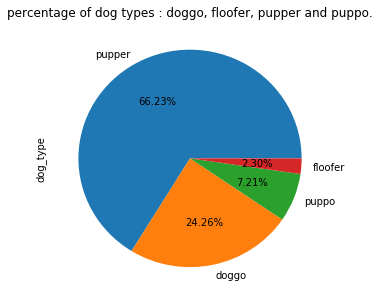

In [158]:
def dog_type(x):
    x.value_counts().plot.pie(figsize=(5,5), autopct='%.2f%%')
    plt.title('percentage of dog types : doggo, floofer, pupper and puppo.')
    plt.show()
    
dog_type(dfs['dog_type'])

It turns out that the most type of dog is pupper by 66.23%.

#### Top 5 name that write tweet.

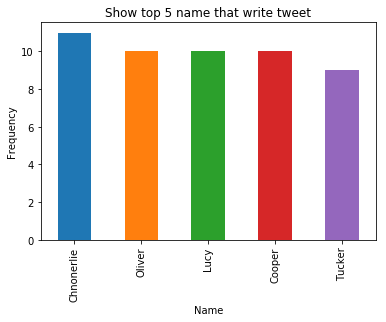

In [159]:
import matplotlib.pyplot as plt
def name(col):
    col.plot(kind='bar',label='show')
    plt.xlabel('Name')
    plt.ylabel('Frequency')
    plt.title('Show top 5 name that write tweet')
    plt.show()
    
name(dfs.name.value_counts().sort_values(ascending=False)[1:6])


It turns out that the highest dog name repeated is Chnonerlie then followed Olive, Cooper, Lucy at the same level and the last name is Tucker.

In [160]:
dfs.name.value_counts().sort_values(ascending=False)[1:6]

Chnonerlie    11
Oliver        10
Lucy          10
Cooper        10
Tucker         9
Name: name, dtype: int64